# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,674,92,37,80,180,67,8,154,43,19,129,180,353,144,69,6,9,190,195
1,165,103,54,91,179,57,11,220,31,25,170,220,707,198,72,1,32,186,198
2,174,93,48,84,150,63,11,156,44,20,165,171,354,188,73,8,15,185,195
3,242,85,42,59,132,58,7,149,46,19,144,166,320,172,83,8,4,179,182
4,367,82,37,59,134,63,7,135,51,18,128,151,264,143,82,11,24,179,185
5,708,94,49,82,137,56,10,159,43,20,160,176,367,186,76,10,7,183,192
6,456,92,43,70,124,52,6,139,49,18,144,164,282,172,79,4,16,183,185
7,145,103,54,107,218,64,12,222,30,25,174,221,728,199,67,0,18,189,200
8,685,85,42,66,120,53,7,149,46,19,143,169,321,160,85,10,7,180,182
9,10,86,36,70,143,61,9,133,50,18,130,153,266,127,66,2,10,194,202


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,424.149362,93.495446,44.816029,81.579235,168.358834,61.750455,8.699454,167.945355,41.182149,20.519126,147.905282,187.965392,435.020036,175.009107,72.661202,6.493625,12.535519,188.779599,195.449909
std,240.745139,8.203306,6.113647,15.735137,34.263905,8.378676,5.179516,32.994646,7.901513,2.557032,14.487666,31.375473,174.134684,31.717185,7.744433,4.930767,8.719949,6.205180,7.413230
min,0.000000,73.000000,33.000000,44.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,220.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,314.000000,150.000000,68.000000,2.000000,6.000000,184.000000,190.000000
50%,425.000000,92.000000,44.000000,78.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,625.000000,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,199.000000,46.000000,23.000000,159.000000,218.000000,596.000000,198.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,110.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
import warnings
warnings.filterwarnings('ignore')

First of all, it is important to balance the dataset. In other words, the number of elements of each class should be the same. Also, for some models, such as PCA, it is very important to normalize the features. We will fo StandartScaling. In other words, the mean should equals 0, the variance equals 1.

In [7]:
y_train = np.array(y_train)

# we have two options -- add or sub num of each class. I think it'is better to add, 
# because in sub case we can completely lose some important information
def make_balance(X, y):
    classes = np.unique(y)
    ret_X, ret_y = [], []
    maxi =  max(len(y[y == name]) for name in classes)
    for name in classes:
        entries = len(y[y == name])
        adder = maxi - entries
        ret_X.append(X[y == name,:])
        adds = X[y == name,:][np.random.randint(0, entries, adder)]
        ret_X.append(adds)
        ret_y  =np.append(ret_y, np.array(maxi * [name]))
        
    return np.concatenate(ret_X) ,ret_y

In [8]:
for name in np.unique(y_train):
    print(f"Number of elements of class {name} equals {len(y_train[y_train == name])}")

print()
X_train, y_train = make_balance(X_train, y_train)
print()

for name in np.unique(y_train):
    print(f"Number of elements of class {name} equals {len(y_train[y_train == name])}")

Number of elements of class bus equals 133
Number of elements of class opel equals 129
Number of elements of class saab equals 150
Number of elements of class van equals 137


Number of elements of class bus equals 150
Number of elements of class opel equals 150
Number of elements of class saab equals 150
Number of elements of class van equals 150


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def st_pipeline(model):
    return Pipeline([("Scaler", StandardScaler()),("Model", model),])

Before starting some learning, let create function, which can find best hyperparameters. By default we will use f1 score

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

In [11]:
def hyperparams_search(pipeline, hyperparams, X_train, y_train, scoring = "f1_macro"):
    searcher = GridSearchCV(
        pipeline,
        hyperparams,
        scoring= scoring,
        refit=True,
    )
    searcher.fit(X_train, y_train)
    return  searcher.best_estimator_, searcher.best_params_

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
pipeline = st_pipeline(LogisticRegression(multi_class="multinomial",solver="saga",tol=1e-3,max_iter=500))
hyperparams = {
    "Model__C": np.linspace(1, 100, 20).tolist(),
    "Model__penalty": ["l1", "l2"],
}

We will find optimal hyperparameters for logistic regression with f1 model quality.

In [14]:
model, best_hyperparams_log = hyperparams_search(pipeline, hyperparams, X_train, y_train) 

In [15]:
print(best_hyperparams_log)
y_pred = model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average="macro"))

{'Model__C': 11.421052631578947, 'Model__penalty': 'l1'}
Accuracy score: 0.7777777777777778
F1 score: 0.7753370927345098


In [16]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot
from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt

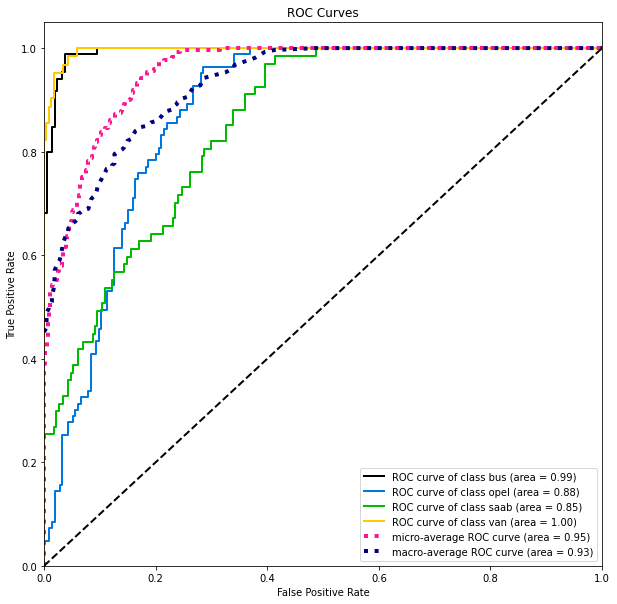

In [17]:
y_pred_proba = model.predict_proba(X_test)
plot_roc(y_test, y_pred_proba, figsize=(10, 10))
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [18]:
from sklearn.decomposition import PCA

num = len(X_train[0])
scaler = StandardScaler()
scaler.fit(X_train)
transform = scaler.transform(X_train)

In [19]:
model = PCA()
model.fit(transform)

PCA()

As we know, in PCA we have singular values from biggest to smallest. So, we will use it to calculate explained variance

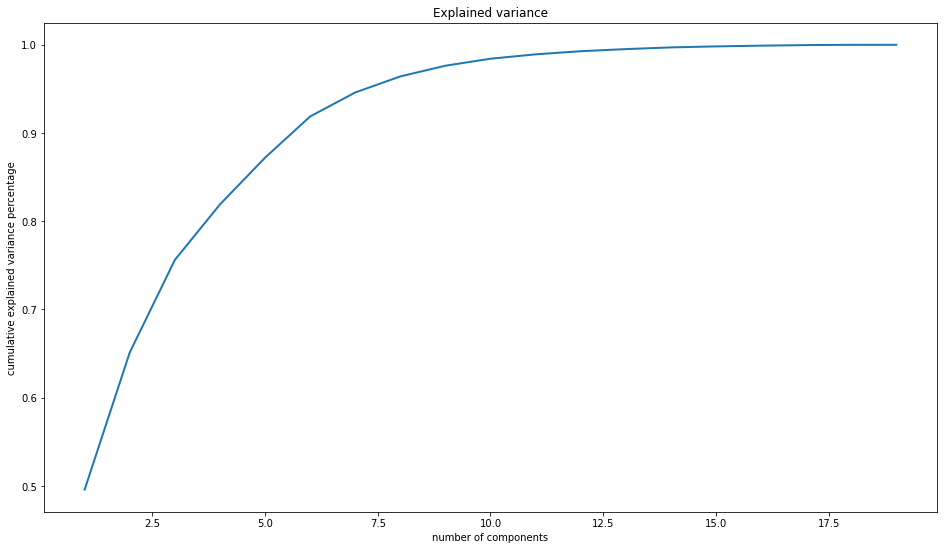

In [20]:
exp_var_sums = np.cumsum(model.explained_variance_ratio_)

plt.figure(figsize = (16 , 9))
plt.title("Explained variance")
plt.plot(np.arange(1, num + 1), exp_var_sums,linewidth=2, label = "Cumulative explained variance")
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance percentage")
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In our pipeline with PCA we will take the number of components, such that the explained variance equals at least 0.95:

In [21]:
def make_pipeline_with_PCA(model):
    return Pipeline([("Scale1", StandardScaler()),("PCA", PCA(n_components=0.95)),
                     ("ScaleAfterPCA", StandardScaler()),("Model", model)])

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [22]:
hyperparams = {
    "Model__C": np.linspace(1, 100, 20).tolist(),
    "Model__penalty": ["l1", "l2"],
}

model = LogisticRegression(multi_class="multinomial",solver="saga",tol=1e-3,max_iter=500)
pipeline = make_pipeline_with_PCA(model)

model, best_hyperparams_pca = hyperparams_search(pipeline, hyperparams, X_train, y_train, scoring = "accuracy") 
print(best_hyperparams_pca)
y_pred = model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average="macro"))


{'Model__C': 1.0, 'Model__penalty': 'l1'}
Accuracy score: 0.5925925925925926
F1 score: 0.588033070793954


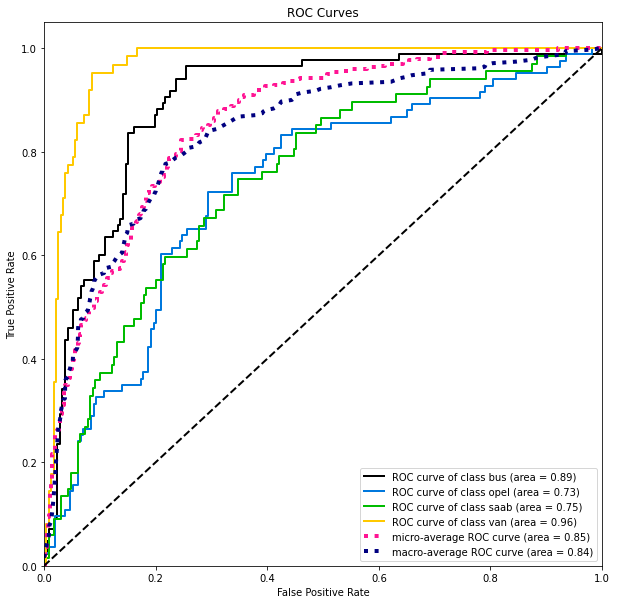

In [23]:
y_pred_proba = model.predict_proba(X_test)
plot_roc(y_test, y_pred_proba, figsize=(10, 10))
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [24]:
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "Model__max_depth": range(1, 24, 3)
}

model = st_pipeline(DecisionTreeClassifier())

model, best_hyperparams_tree = hyperparams_search(model, hyperparams, X_train, y_train)

In [25]:
print(best_hyperparams_tree)
y_pred = model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average="macro"))

{'Model__max_depth': 10}
Accuracy score: 0.6767676767676768
F1 score: 0.6784366251308801


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [26]:
from sklearn.ensemble import BaggingClassifier

In [27]:
N_s = np.arange(2, 100, 5).tolist() + [100]

In [28]:
base_estimator_log = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    tol=1e-3,
    penalty = best_hyperparams_log["Model__penalty"],
    C = best_hyperparams_log["Model__C"]
)

base_estimator_tree = DecisionTreeClassifier(max_depth = best_hyperparams_tree['Model__max_depth'])

In [29]:
acc_scores_log = []
f1_scores_log = []

acc_scores_tree = []
f1_scores_tree = []

for n in N_s:
        model_log = st_pipeline(BaggingClassifier(base_estimator_log, n))
        model_tree = st_pipeline(BaggingClassifier(base_estimator_tree, n))
        model_log.fit(X_train, y_train)
        model_tree.fit(X_train, y_train)
        
        y_pred_log = model_log.predict(X_test)
        y_pred_tree = model_tree.predict(X_test)
        
        acc_scores_log.append(accuracy_score(y_test, y_pred_log))
        acc_scores_tree.append(accuracy_score(y_test, y_pred_tree))
        
        f1_scores_log.append(f1_score(y_test, y_pred_log, average="macro"))
        f1_scores_tree.append(f1_score(y_test, y_pred_tree, average="macro"))

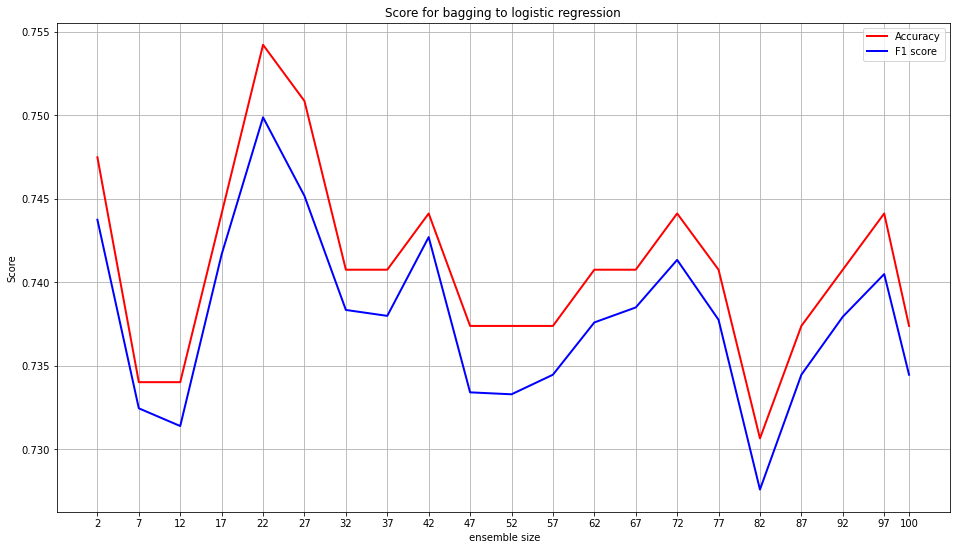

In [30]:
plt.figure(figsize=(16, 9))
plt.title("Score for bagging to logistic regression")
plt.plot(N_s, acc_scores_log, label="Accuracy", linewidth=2, color = 'red')
plt.plot(N_s, f1_scores_log, label="F1 score", linewidth=2, color = 'blue')
plt.xlabel(" ensemble size")
plt.xticks(N_s)
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()

For logistic regression bagging doesn't improve the quality strongly.

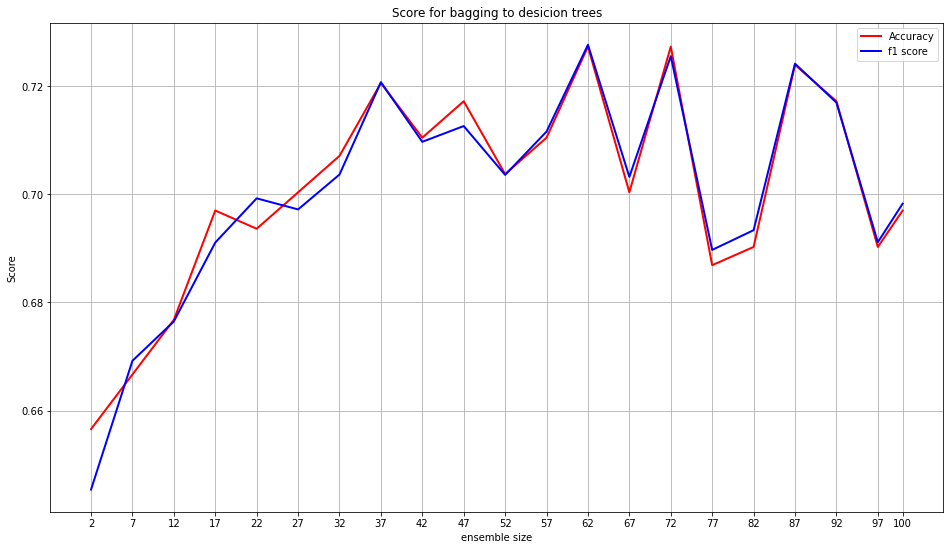

In [31]:
plt.figure(figsize=(16, 9))
plt.title("Score for bagging to desicion trees")
plt.plot(N_s, acc_scores_tree, label="Accuracy", linewidth=2, color = 'red')
plt.plot(N_s, f1_scores_tree, label="f1 score", linewidth=2, color = 'blue')
plt.xlabel("ensemble size")
plt.xticks(N_s)
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()

For trees the best ensemble size is 67, but we see significant improve only from 2 to 32 jump. 

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

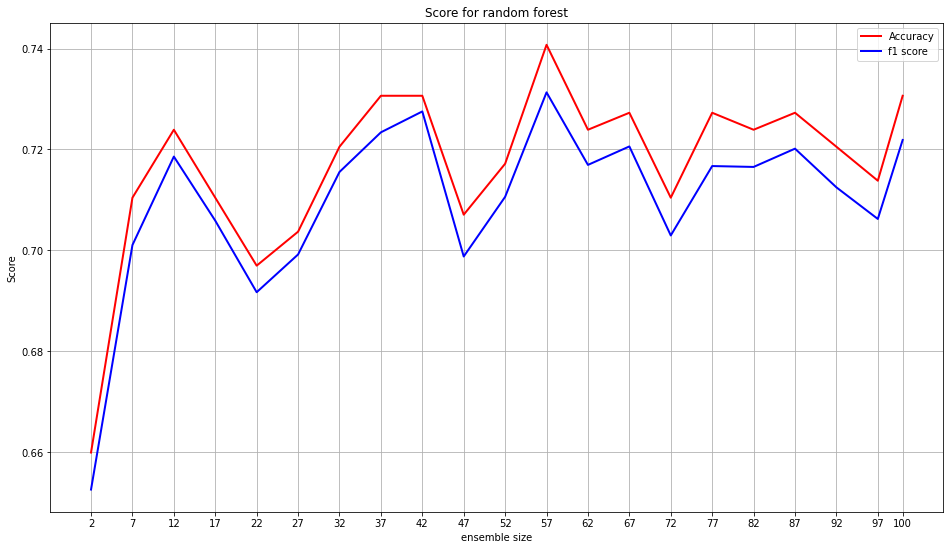

In [32]:
from sklearn.ensemble import RandomForestClassifier

N_s = np.arange(2, 100, 5).tolist() + [100]

acc_scores_randforest = []
f1_scores_randforest = []

for n in N_s:
        model_randforest = st_pipeline(RandomForestClassifier(n_estimators=n, \
                                                max_depth=best_hyperparams_tree["Model__max_depth"]))
        model_randforest.fit(X_train, y_train)
        
        y_pred_randforest = model_randforest.predict(X_test)
    
        
        acc_scores_randforest.append(accuracy_score(y_test, y_pred_randforest))
        f1_scores_randforest.append(f1_score(y_test, y_pred_randforest, average="macro"))

plt.figure(figsize=(16, 9))
plt.title("Score for random forest")
plt.plot(N_s, acc_scores_randforest, label="Accuracy", linewidth=2, color = 'red')
plt.plot(N_s, f1_scores_randforest, label="f1 score", linewidth=2, color = 'blue')
plt.xlabel("ensemble size")
plt.xticks(N_s)
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()

The results for random forest are little better that bagging and more stable for emsenble size. Significant improve goes from 2 to 12.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [33]:
def take_part(X_train, y_train, parts, size):
    classes = np.unique(y_train)
    ret_X, ret_y = [], []
    entites = len(X_train[y_train == classes[0]])
    entities_from_each_class = int(np.round(entites * (size / parts)))
    for name in classes:
        sample = list(X_train[y_train == name])
        ret_X.append(sample[:entities_from_each_class])
        ret_y.append([name] * entities_from_each_class)
    
    return np.concatenate(ret_X), np.concatenate(ret_y)

In [34]:
base_estimator_log = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    tol=1e-3,
    penalty = best_hyperparams_log["Model__penalty"],
    C = best_hyperparams_log["Model__C"]
)

base_estimator_tree = DecisionTreeClassifier(max_depth = best_hyperparams_tree['Model__max_depth'])

best_ensemble_size_random_forest = N_s[acc_scores_randforest.index(max(acc_scores_randforest))]
 
base_estimator_randfor = RandomForestClassifier(n_estimators=best_ensemble_size_random_forest, \
                                                max_depth=best_hyperparams_tree["Model__max_depth"])


In [35]:
parts = 10
sizes = np.arange(1, parts + 1, 1)
log_acc, log_f1 = [], []
tree_acc, tree_f1 = [], []
randfor_acc, randfor_f1 = [], []

for sz in sizes:
    model_log = st_pipeline(base_estimator_log)
    model_tree = st_pipeline(base_estimator_tree)
    model_randfor = st_pipeline(base_estimator_randfor)
    
    X_tr, y_tr = take_part(X_train, y_train,parts, sz)
    
    model_log.fit(X_tr, y_tr)
    model_tree.fit(X_tr, y_tr)
    model_randfor.fit(X_tr, y_tr)
    
    y_pred_log = model_log.predict(X_test)
    y_pred_tree = model_tree.predict(X_test)
    y_pred_randfor = model_randfor.predict(X_test)
    
    
    log_acc.append(accuracy_score(y_test, y_pred_log))
    log_f1.append(f1_score(y_test, y_pred_log, average="macro"))
    tree_acc.append(accuracy_score(y_test, y_pred_tree))
    tree_f1.append(f1_score(y_test, y_pred_tree, average="macro"))
    randfor_acc.append(accuracy_score(y_test, y_pred_randfor))
    randfor_f1.append(f1_score(y_test, y_pred_randfor, average="macro"))

In [36]:
xticks = np.arange(1, parts + 1).tolist()

def make_plot(acc_res, f1_res, xticks, title):
    plt.figure(figsize=(16, 9))
    plt.plot(xticks, acc_res, label="Accuracy", linewidth=2, color = 'red')
    plt.plot(xticks, f1_res, label="F1 score", linewidth=2, color = 'blue')
    plt.xlabel("Training part")
    plt.title(title)
    plt.xticks(ticks=xticks,
               labels=["$\\frac{%d}{%d}$" % (p, parts) for p in xticks])
    plt.ylabel("Score")
    plt.legend()
    plt.show()

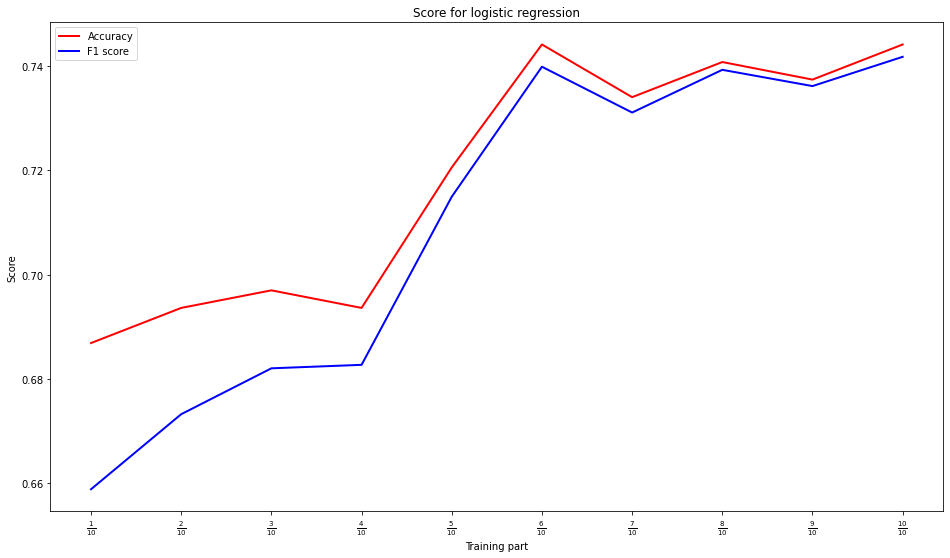

In [37]:
make_plot(log_acc, log_f1, xticks, "Score for logistic regression")

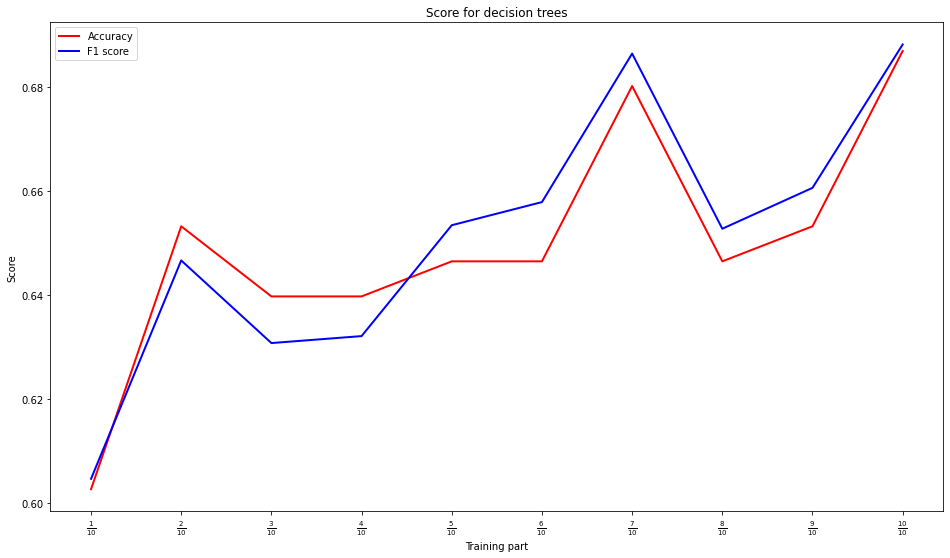

In [38]:
make_plot(tree_acc, tree_f1, xticks, "Score for decision trees")

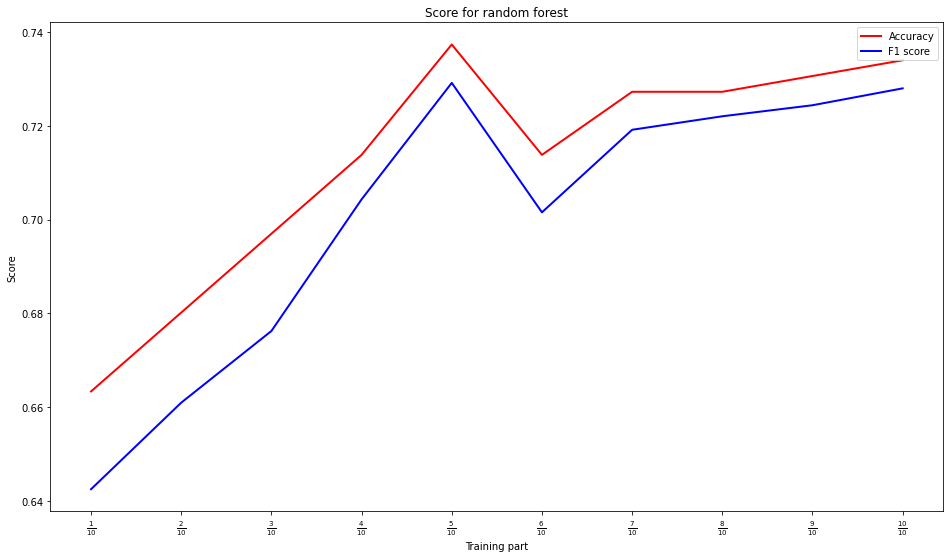

In [39]:
make_plot(randfor_acc, randfor_f1, xticks, "Score for random forest")

**Conclusion:** As we see, if the size of training part is bigger, that the score is better for all models. So we can conclude that the size of training part is very aspect.